In [20]:
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import rc,rcParams

In [21]:
c=np.loadtxt('cooltable.dat')

In [22]:
c[:,0]

array([1.0000000e+01, 1.0209000e+01, 1.0423000e+01, ..., 9.3317362e+19,
       9.6600912e+19, 1.0000000e+20])

In [23]:
def r(T):
    return 1.4e-27 *np.sqrt(T)*1.2*(1.+4.4e-10 *T)

(7.854482931953713e-29, 1e-14)

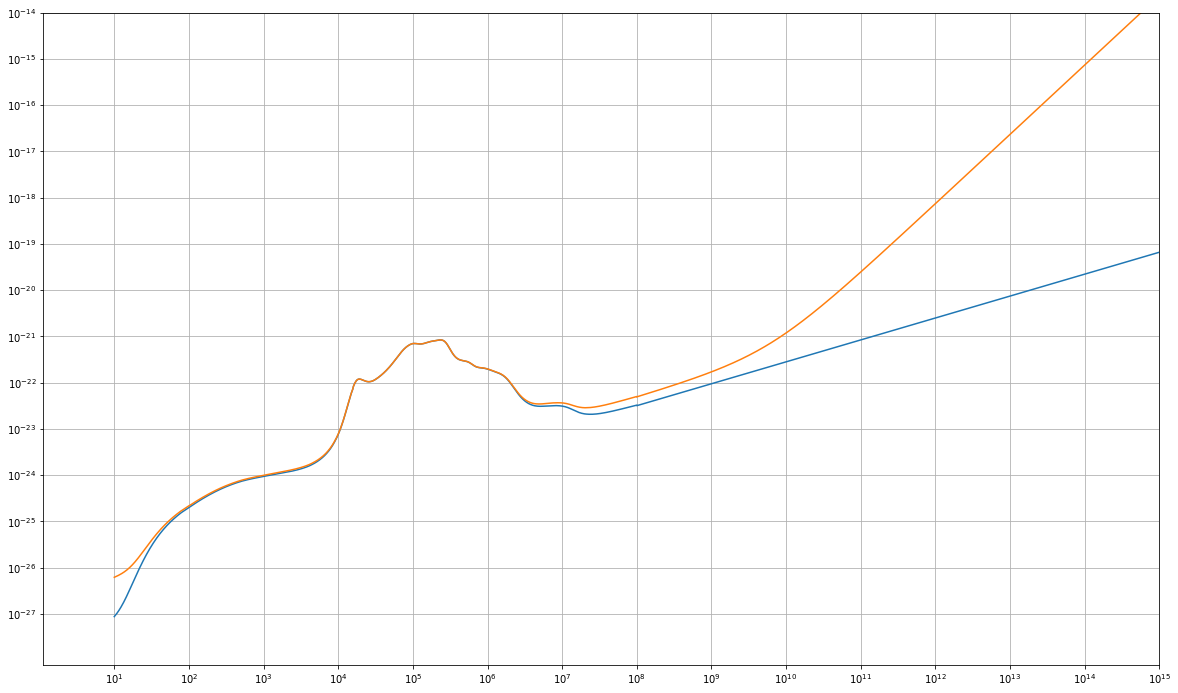

In [106]:
plt.loglog(c[:,0],c[:,1])
rcParams['figure.figsize'] = (20., 12.0)
plt.loglog(c[:,0],c[:,1]+r(c[:,0]))
plt.xticks(np.logspace(1,19,19))
plt.yticks(np.logspace(-27,-7,21))
plt.grid()
plt.xlim(None,1e15)
plt.ylim(None,1e-14)

In [82]:
T0=10**13.7
def Tdot(T,t):
    L=1.4e-27*np.sqrt(T)*1.2*(1.+4.4e-10 *T)
    n=1
    kb=1.38e-16
    return -n**2*1e9*L/kb

In [83]:
from scipy.integrate import odeint

In [86]:
Tdot(T0,1)

-1900651817.4683766

In [94]:
tt=np.arange(0,10000,1)
T=odeint(Tdot,y0=[T0],t=tt)

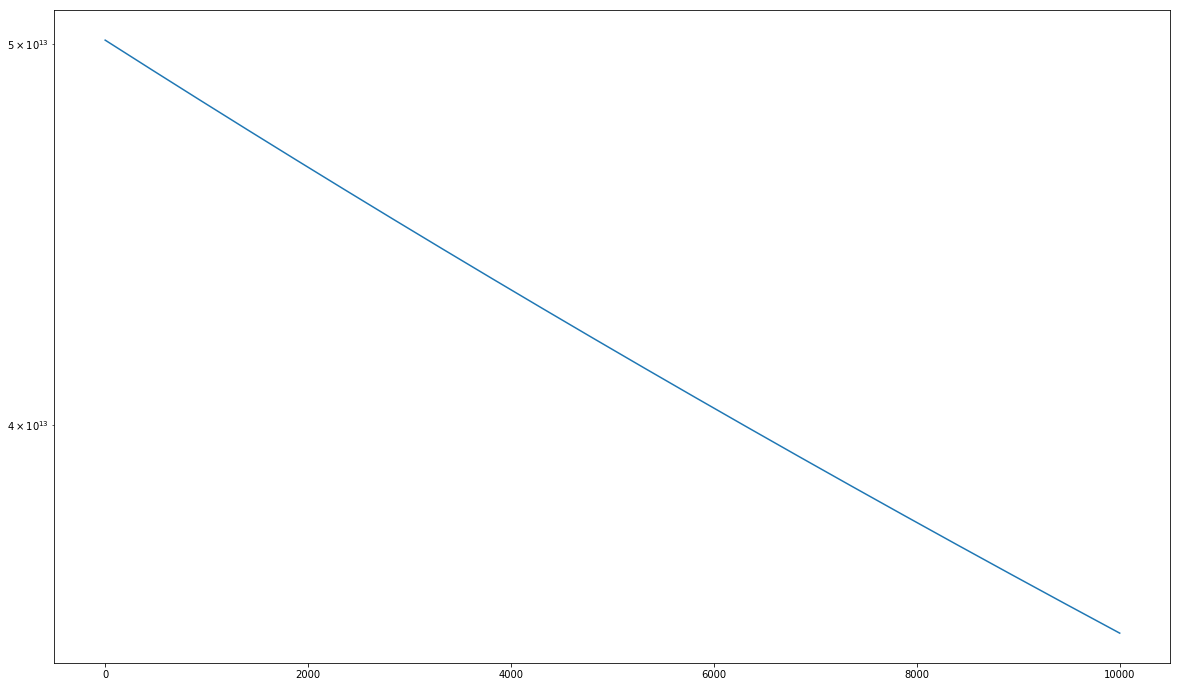

In [96]:
plt.plot(tt,T)
plt.yscale('log')

In [14]:
A=np.zeros(c.shape)

In [15]:
A[:,0]=c[:,0]
A[:,1]=c[:,1]+r(c[:,0])


In [17]:
pwd

'/home/astromix/astro/JetCloudSim/PLUTO template'

In [18]:
np.savetxt('cooltable2.dat',A)

In [107]:
pwd

'/home/astromix/astro/JetCloudSim/PLUTO template'

In [109]:
R=np.load('../../Random_data_set.npz')

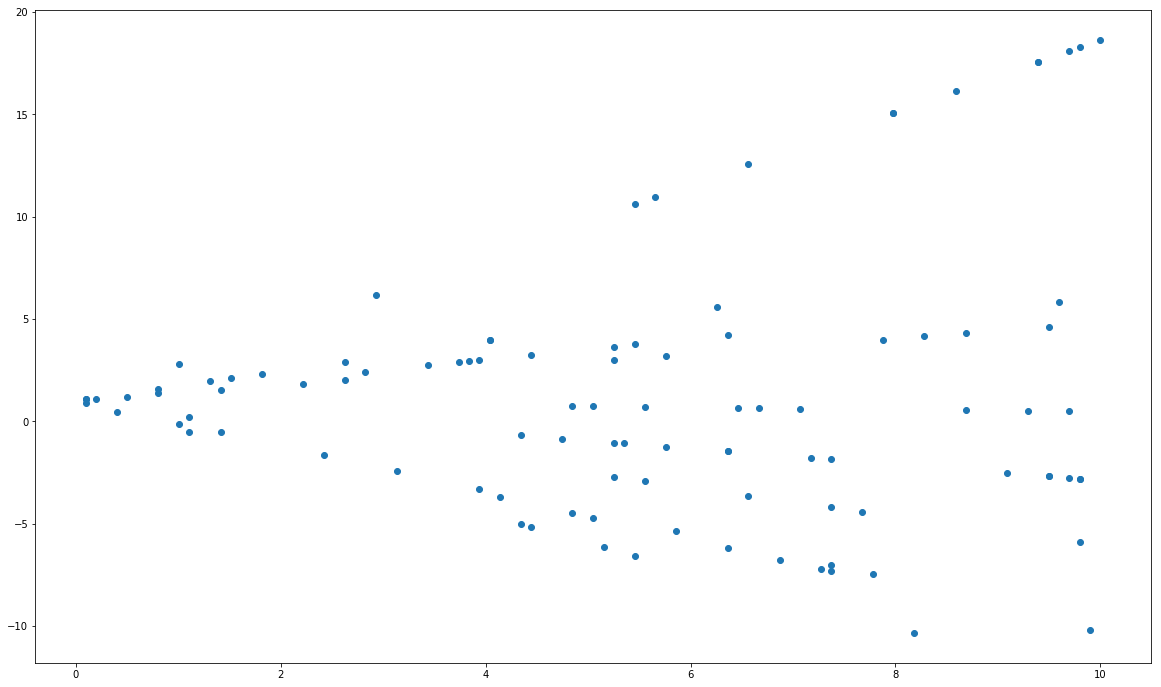

In [118]:
plt.plot(R['arr_0'],R['arr_1'],'o')

In [119]:
#reload(models)
x_data=R['arr_0']
y_data=R['arr_1']
with pm.Model() as model: # model specifications in PyMC3 are wrapped in a with-statement
    # Define priors
    mua=pm.Normal('mua',1.5,sd=1)
    siga = pm.Normal('sigmaa',0.5, 0.4)
    a=pm.Normal('a',mua,sd=siga)
    b=pm.Uniform('b',-5,5)
    sigma = pm.Gamma('sigma', alpha=1, beta=0.5)
    #sigma=pm.TruncatedNormal('sigma',0.5,sd=0.3,lower=0.01,upper=2)
    
    mu = a*x_data+b
    # Define likelihood
    likelihood = pm.Normal('y', mu=mu, sd=sigma, observed=y_data)

    # Inference!
    trace = pm.sample(3000, cores=1,tune=1000) # draw 3000 posterior samples using NUTS sampling

NameError: name 'pm' is not defined